# Goals: Build a binary classification model using logistic regression + weight decay (L2 reg) from scratch

Use python and limited numpy functionality

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [8]:
from model.metrics import accuracy,logloss
from model.gradients import logloss_sigmoid_grad
from model.utils import *
from model.activations import sigmoid
import matplotlib.pyplot as plt
from model.
seed=42
np.random.seed(seed)

# Create linear binary classification dataset

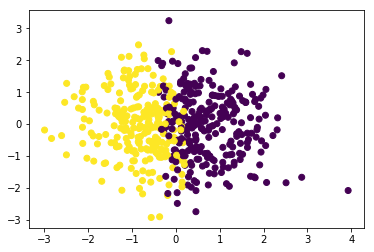

In [7]:
size=500
X,y,W = generate_linear_dataset(size,2,noise_bound=0.8,is_reg=False)
plt.scatter(X[:,1],X[:,2],c=y)

# Metric

We will use log loss as loss function for this binary classification task

In [12]:
loss_fn = logloss

We use sigmoid activation (squash input between 0 and 1) to get our prediction probability. Thus our gradient function will be a combination of sigmoid and log loss, which happens to be similar to MSE gradient function

In [13]:
act_fn = sigmoid
grad_fn = logloss_sigmoid_grad

# Customized Logistic Regression

In [10]:
from model.linear_model import CustomLinearModel

In [ ]:
size=500
dim=2
X1,y1,W = generate_linear_dataset(size,dim,is_reg=False)

## Gradient Descent, no L2

20. Training loss: 0.6146470985653965, Val loss:0.6148325895492094
40. Training loss: 0.5884849493248355, Val loss:0.5914560503183568
60. Training loss: 0.5651365086508895, Val loss:0.5704072571106122
80. Training loss: 0.5442256834197121, Val loss:0.5513909651841744
100. Training loss: 0.5254260412860776, Val loss:0.5341490437588468
120. Training loss: 0.5084573820822493, Val loss:0.5184580105469349
140. Training loss: 0.49308063225456905, Val loss:0.5041254675205452
160. Training loss: 0.4790923184094678, Val loss:0.4909862201604508
180. Training loss: 0.46631929339181144, Val loss:0.47889851941186684
200. Training loss: 0.45461401375686783, Val loss:0.46774063829869933


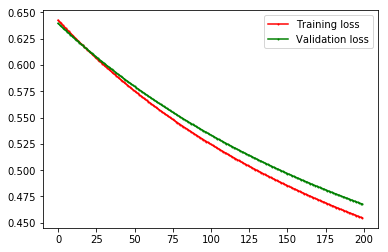

In [18]:
lr = CustomLinearModel(dim,False,loss_fn,grad_fn,act_fn)
lr.fit(X1,y1,lr=0.01,n_iteration =200,val_ratio=0.2)

In [19]:
y_pred = lr.predict(X1)
accuracy(y1,y_pred)

0.91

Plot validation set and decision boundary

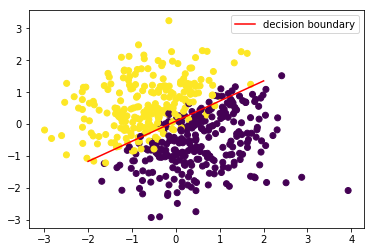

In [20]:
plt.scatter(X1[:,1],X1[:,2],c=y1)

ex1 = np.linspace(-2, 2, 100)
ex2 = -(lr.W[1] * ex1 + lr.W[0]) / lr.W[2]

plt.plot(ex1, ex2, color='r', label='decision boundary');
plt.legend()
plt.show()

## Gradient Descent, L2

20. Training loss: 0.6035072599362341, Val loss:0.6063134492234821
40. Training loss: 0.5787430214702753, Val loss:0.5839442222389191
60. Training loss: 0.5566340931700762, Val loss:0.5637990878385567
80. Training loss: 0.5368194588201021, Val loss:0.5455910271832699
100. Training loss: 0.51898891152413, Val loss:0.5290714675781766
120. Training loss: 0.5028779992712467, Val loss:0.5140266550750066
140. Training loss: 0.48826211396022257, Val loss:0.5002734411563595
160. Training loss: 0.4749506593653601, Val loss:0.4876550868390189
180. Training loss: 0.46278174440258296, Val loss:0.47603738956671404
200. Training loss: 0.4516175612755039, Val loss:0.46530525669010464


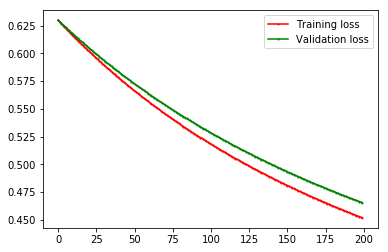

In [27]:
lr = CustomLinearModel(dim,False,loss_fn,grad_fn,act_fn)
lr.fit(X1,y1,lr=0.01,l2=1,n_iteration =200,val_ratio=0.2)

In [28]:
y_pred = lr.predict(X1)
accuracy(y1,y_pred)

0.92

## Stochastic gradient descent

Epoch 1. Training loss: 0.6700408584560396, Val loss:0.6396421478147974
Epoch 2. Training loss: 0.6381984657131768, Val loss:0.6135613658917919
Epoch 3. Training loss: 0.6095162357562941, Val loss:0.5898984957310477
Epoch 4. Training loss: 0.5836623375249218, Val loss:0.5684098959070353
Epoch 5. Training loss: 0.5603266352213958, Val loss:0.5488678311534051
Epoch 6. Training loss: 0.5392263701720375, Val loss:0.5310635902242216
Epoch 7. Training loss: 0.5201079401965195, Val loss:0.5148085223704225
Epoch 8. Training loss: 0.5027462012909537, Val loss:0.49993371898556416
Epoch 9. Training loss: 0.486942467046102, Val loss:0.48628891703178845
Epoch 10. Training loss: 0.47252197598708034, Val loss:0.4737410145367833
Epoch 11. Training loss: 0.459331260443238, Val loss:0.46217243951047143
Epoch 12. Training loss: 0.44723563231004393, Val loss:0.45147951332200464
Epoch 13. Training loss: 0.4361168778979891, Val loss:0.4415708870653621
Epoch 14. Training loss: 0.4258711906850742, Val loss:0.

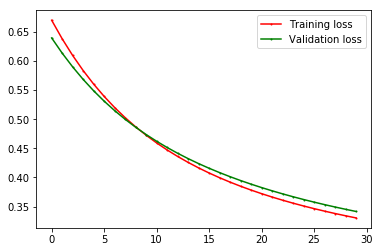

In [51]:
lr = CustomLinearModel(dim,False,loss_fn,grad_fn,act_fn)
lr.fit_epoch(X1,y1,0.01,30,20)

In [52]:
y_pred = lr.predict(X1)
accuracy(y1,y_pred)

0.916

Plot validation set and decision boundary

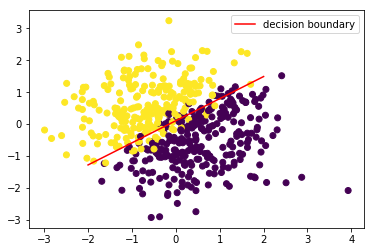

In [55]:
plt.scatter(X1[:,1],X1[:,2],c=y1)

ex1 = np.linspace(-2, 2, 100)
ex2 = -(lr.W[1] * ex1 + lr.W[0]) / lr.W[2]

plt.plot(ex1, ex2, color='r', label='decision boundary');
plt.legend()
plt.show()

# Sklearn for comparison

In [60]:
from sklearn.linear_model import LogisticRegression

X_train,y_train,X_val,y_val = get_train_val(X1,y1)
lr = LogisticRegression(random_state = seed,penalty='l2',max_iter=100)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
y_train_pred=lr.predict_proba(X_train)[:,1]
y_val_pred = lr.predict_proba(X_val)[:,1]
print('Log Loss on train set: ')
print(logloss(y_train,y_train_pred))
print('Log Loss on valid set: ')
print(logloss(y_val,y_val_pred))
print('Accuracy: ')
print(accuracy(y_val,lr.predict(X_val)))

Log Loss on train set: 
0.16957970356257498
Log Loss on valid set: 
0.1461889817725507
Accuracy: 
0.96


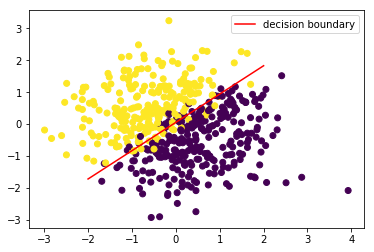

In [62]:
# plot validation set and decision boundary
plt.scatter(X1[:,1],X1[:,2],c=y1)

ex1 = np.linspace(-2, 2, 100)
ex2 = -(lr.coef_[:, 1] * ex1 + lr.intercept_) / lr.coef_[:,2]

plt.plot(ex1, ex2, color='r', label='decision boundary');
plt.legend()
plt.show()

Sklearn performs better in this case